# Covid-19 Projections for Bangladesh

## March 26, 2020

## Projection of ICU Bed Requirements, Hospitalization Demands, Death Rates 

## 0. Contents

<ol>
    <li> Introduction </li>
    <li> A simple (almost back of the envelop) estimation method </li>
    <li> Running simulations for Bangladesh 
        <ol>
        <li> Estimating Number of True-Infected on March 26, 2020 </li>
            <ol>
                <li> optimistic projection </li>
                <li> balanced projection </li>
                <li> pessimistic projection </li>
            </ol>
        <li> Forecasting ICU Bed Requirements, Hospitalization Demands, Death Rates </li> 
            <ol>
                <li> optimistic projection </li>
                <li> balanced projection </li>
                <li> pessimistic projection </li>
            </ol>
        </ol>
    <li> Scenario Summary </li>
    <li> Useful Resources </li>
</ol>

### 1. Introduction

**Here I am trying to forecast ICU bed requirements, hospitalization requirements, and death rates for Covid-19 outbreak in Bangladesh in 2020.** I hope this will help decision-makers in public healthcare sector, as well as private volunteer groups who have come forward in tackling the crisis in making decisions.   

**This is a very simple, almost back-of-the-envelop simulation. So it may not be the most accurate or sophisticated approach.** 

**disclaimer: I am not an epidemiologist.**  

**I am simulating based on 3 sets of assumptions** 
<ol>
    <li> Pessimistic assumptions </li>
    <li> Balanced assumptions </li>
    <li> Optimistic assumptions </li>
</ol>
    
The simulated numbers will therefore, have large range. 

**My simulation takes into account the policy decision to declare 9-day holidays starting March 26, 2020.** 

**Also, I am terminating the simulation as soon as a death-count of 5,000 is reached**. This is because, I believe if and when that level is reached, two things will happen:

<ol>
    <li> More restrictive policy decisions will be taken (i.e. total lockdown).</li>
    <li> People themselves will change their behavior when they see people around them dying. </li> 
</ol>

I believe as a result, the model parameters used for simulation will change drastically, making any forecast beyond that point unreliable. 


### 2. A simple (almost back of the envelop) estimation method

**Even with extensive testing many covid-19 infected remain undetected.** This is because many patients will develop mild symptoms only, or no symptoms at all, while still infecting others unknowingly.

**Sal Khan of Khan Academy shows a simple formula to estimate actual total number of covid-19 infected today from total number of covid-19 deaths today.** 

It is important to note that this is a very simple model with simple assumptions.The method he is using is detailed in the following video.

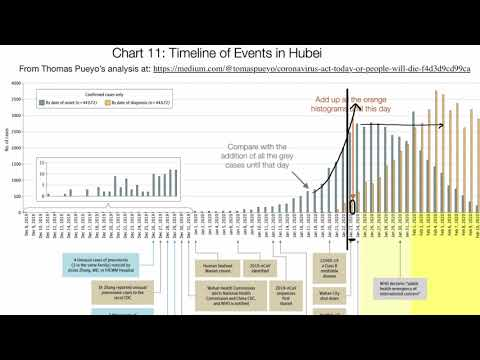

In [4]:
from IPython.display import YouTubeVideo
YouTubeVideo('mCa0JXEwDEk')

Here is how this estimation works.

**The key assumptions detailed in the video, which are based on early empirical findings from Wuhan, China are as follows**:

<ol>
    <li> For those who die, it takes on average $20$ days from infection to death. </li>
    <li> For those who get infected today, $1$% dies after $20$ days. (the low rate is due to factoring-in that many do not develop symptoms and stay undetected). </li>
</ol>

Hence for $1$ dead patient today, approximately $100$ got infected $20$ days ago. 

It takes approximately $5$ days (global avg.) for the number of infected to double based on empirical observation of other countries. 

In $20$ days, the number of total infected doubles $20/5 = 4$ times,  by a total of $2^4 = 16$ times. 

Hence, 1 dead covid-19 patient today means approximately $100*16 = 1600$ total infected till day. 

This has been the case in Wuhan, China


### 3. Running a simulation for Bangladesh

#### 3.1 Estimating Total True-Infected Population on March 26, 2020 (Before 9-day National Holiday Declaration)

The 3 numbers needed in this approach to estimate total true-infected population are:

<ol>
    <li> days-to-double </li>
    <li> 20-day forward death-rate </li>
    <li> true death-count </li>
</ol>

The **'days-to-duble'** parameter for Bangladesh could be as low as $2$ considering the population density (pessimestic approach), before the lockdown-like policy decisions came into effect on March 26, 2020. In several countries and dense cities, there are instances of this parameter being as low as $2$, so it is not a wild assumption to consider. In the subcontinent, there are claims that this number has been $4$ (optimistic approach). I will also simulate based on this number being $3$ (balanced approach).

For the **'20-day-forward death-rate'**, I am taking the estimated rate from Wuhan, China which is around $1$% (pessimistic approach). I will also be considering $2$% (balanced approach) and $4$% (optimistic approach) 20-day-forward death-rate. Please note, in this context, a higher death-rate means more optimistic assumption, as the higher the 20-day-forward death rate, the lower the size of estimated true-infected population on March 26, 2020.

For the **true death-count**, I am taking the official number of $5$ (optimistic approach), but also simulating based on true death-count of $10$ (balanced assumption) and 15 (pessimistic assumption). This is not unwarranted to assume that half or two-third of deaths due to Covid-19 may have remained unreported as healthcare coverage is low in the country.   

In [124]:
import numpy as np
days2double = np.array([4, 3, 2])           # optimistic, balanced, pessimistic; 
                                            # Days it takes for number of Covid-19 infected to double.
deathrate   = np.array([0.04,0.02,0.01])    # optimistic, balanced, pessimistic;
                                            # 20-day-forward death rate.
deathcount  = np.array([5,10,15])           # optimistic, balanced, pessimistic;
                                            # Number of deaths from Covid-19
symptom2death = 20                          # Avg. duration in days for those who dies from getting infected to dying 

true_infected = deathcount*(1/deathrate)*2**(symptom2death/days2double)

print('optimistic projection:')
print('number of true-infected on March 06, 2020 is', round((deathcount*(1/deathrate))[0]))
print('number of true-infected on March 26, 2020 is', round(true_infected[0]))
print('_______________________________________________________________________________')
print('balanced projection:')
print('number of true-infected on March 06, 2020 is', round((deathcount*(1/deathrate))[1]))
print('number of true infected on March 26, 2020 is', round(true_infected[1]))
print('_______________________________________________________________________________')
print('pessimistic projection:')
print('number of true-infected on March 06, 2020 is', round((deathcount*(1/deathrate))[2]))
print('number of true-infected on March 26, 2020 is', round(true_infected[2]))

optimistic projection:
number of true-infected on March 06, 2020 is 125.0
number of true-infected on March 26, 2020 is 4000.0
_______________________________________________________________________________
balanced projection:
number of true-infected on March 06, 2020 is 500.0
number of true infected on March 26, 2020 is 50797.0
_______________________________________________________________________________
pessimistic projection:
number of true-infected on March 06, 2020 is 1500.0
number of true-infected on March 26, 2020 is 1536000.0


It can be noted that the range of the projection of true-infected on March 26, 2020 $(4,000 - 153,600)$ is rather huge. This reflects the underlying uncertainty with the parameter values. As this process follows compounding growth, a seemingly small difference in parameters can result in huge difference in estimated number of true-infected. 

#### 3.2 Forecasting ICU Bed Requirements, Hospitaization Demand, Death Rates (After 9-day National Holiday Declaration)

The numbers needed for this simulation are:

<ol>
    <li> days-to-double </li>
    <li> number of true-infected on March 26, 2020 </li>
    <li> hospitalization requirement rate </li>
    <li> ICU requirement rate </li>
    <li> time till hospitalization </li>
    <li> case-fatality-rate </li>
</ol>

For **'days-to-double'**, I am running the simulation taking into consideration that, lockdown-like measures have been put in place effective March 26, 2020; hence it can be reasonably expected that the 'days-to-double' paramter would go up (the speed of spread will go down). I am assuming it will go up to become $5$ (balanced approach). 

For **number of true-infected on March 26, 2020**, the estimated numbers are $4,000$, $50,797$, and $1,536,000$ respectively.

For **hospitalization requirement rate**, global average is around $20$% of detected patients, which is $10$% of true-infected, as we are considering as much as half may remain asymptomatic) (balanced approach). Considering a significant male population is smoker and those living in Dhaka breath one of the unhealthiest of air, I am also considering that this number can be as high as $12.5$% (pessimistic approach). On the other hand, considering the age-distribution of Bangladesh is skewed to the younger side with a median age of only 25-30 years, this rate can be lower, say $7.5$% (optimistic approach). Following the same logic, the **ICU requriement rate** is taken as $2.5$% (balanced approach) which is global average, $1.25$% (optimistic approach) and $3.75$% (pessimistic approach). 

**time till hospitalization** is around 10 days (around 5 days after starting to show symptoms). 

**Case-fatality-rate** in Wuhan, China was found to be $4$% (optimistic approach). However, considering shortage of ICUs and hospital beds in the country, I am also considering $7.5$% (balanced approach, global average for closed detected cases is 15%, with half remaining asymptomatic and undetected, this rate comes down to $7.5$%), and $10$% (pessimistic approach, based on global average hospitalization rate). 

In [126]:
import datetime as dt
from datetime import timedelta
date = dt.date(2020, 3, 26)
delta = timedelta(days=5)

days2double = 5                                     # Days it takes for number of Covid-19 infected to double.

hospitalization_rate = np.array([0.075, 0.1, 0.125])# % requiring hospitalization of true-infected, 
                                                    # half of the rate of % requiring hospitalization of detected, 
                                                    # assuming half of infected remains asymptomatic.

icu_rate = [0.0125, 0.025, 0.0375]                  # % requiring icu of true-infected, 
                                                    # half of the rate of % requiring icu of detected,
                                                    # assuming half of infected remains asymptomatic.
        
time2hospitalize = timedelta(days=10)               # Number of days for those who need hospitalization, from being infected to
                                                    # requiring hospitalization.
    
time2death       = timedelta(days=20)               # Number of days for those who die, from being infected to dying.

casefatality = np.array([0.04, 0.075, 0.1])               # % of true-infected (including those asymptomatic) who die.  

pop = 168700000   #Population of Bangladesh.

In [131]:
inew = 0
i = inew
true_infected = true_infected_0*2**i  
while true_infected[0]*casefatality[0]/16 < 5001:
    i = inew
    true_infected[0] = true_infected_0[0]*2**i 
    print('Optimistic Projection')
    print('=====================')
    print('Date:',date+delta*i)
    print('=====================')
    print('Total True-infected',round(true_infected[0]))
    print('Total Detectable-infected',round(true_infected[0]/2))
    print('Total Hospitalization Demand', round(true_infected[0]*hospitalization_rate[0]/4))
    print('Total ICU Demand', round(true_infected[0]*icu_rate[0]/4))
    print('Total Death Count', round(true_infected[0]*casefatality[0]/16))
    inew = i+1

Optimistic Projection
Date: 2020-03-26
Total True-infected 4000.0
Total Detectable-infected 2000.0
Total Hospitalization Demand 75.0
Total ICU Demand 12.0
Total Death Count 10.0
Optimistic Projection
Date: 2020-03-31
Total True-infected 8000.0
Total Detectable-infected 4000.0
Total Hospitalization Demand 150.0
Total ICU Demand 25.0
Total Death Count 20.0
Optimistic Projection
Date: 2020-04-05
Total True-infected 16000.0
Total Detectable-infected 8000.0
Total Hospitalization Demand 300.0
Total ICU Demand 50.0
Total Death Count 40.0
Optimistic Projection
Date: 2020-04-10
Total True-infected 32000.0
Total Detectable-infected 16000.0
Total Hospitalization Demand 600.0
Total ICU Demand 100.0
Total Death Count 80.0
Optimistic Projection
Date: 2020-04-15
Total True-infected 64000.0
Total Detectable-infected 32000.0
Total Hospitalization Demand 1200.0
Total ICU Demand 200.0
Total Death Count 160.0
Optimistic Projection
Date: 2020-04-20
Total True-infected 128000.0
Total Detectable-infected 640

In [132]:
inew = 0
i = inew
true_infected = true_infected_0*2**i  
while true_infected[1]*casefatality[1]/16 < 5001:
    i = inew
    true_infected[1] = true_infected_0[1]*2**i 
    print('Balanced Projection')
    print('=====================')
    print('Date:',date+delta*i)
    print('=====================')
    print('Total True-infected',round(true_infected[1]))
    print('Total Detectable-infected',round(true_infected[1]/2))
    print('Total Hospitalization Demand', round(true_infected[1]*hospitalization_rate[1]/4))
    print('Total ICU Demand', round(true_infected[1]*icu_rate[1]/4))
    print('Total Death Count', round(true_infected[1]*casefatality[1]/16))
    inew = i+1

Balanced Projection
Date: 2020-03-26
Total True-infected 16000.0
Total Detectable-infected 8000.0
Total Hospitalization Demand 400.0
Total ICU Demand 100.0
Total Death Count 75.0
Balanced Projection
Date: 2020-03-31
Total True-infected 32000.0
Total Detectable-infected 16000.0
Total Hospitalization Demand 800.0
Total ICU Demand 200.0
Total Death Count 150.0
Balanced Projection
Date: 2020-04-05
Total True-infected 64000.0
Total Detectable-infected 32000.0
Total Hospitalization Demand 1600.0
Total ICU Demand 400.0
Total Death Count 300.0
Balanced Projection
Date: 2020-04-10
Total True-infected 128000.0
Total Detectable-infected 64000.0
Total Hospitalization Demand 3200.0
Total ICU Demand 800.0
Total Death Count 600.0
Balanced Projection
Date: 2020-04-15
Total True-infected 256000.0
Total Detectable-infected 128000.0
Total Hospitalization Demand 6400.0
Total ICU Demand 1600.0
Total Death Count 1200.0
Balanced Projection
Date: 2020-04-20
Total True-infected 512000.0
Total Detectable-infect

In [130]:
inew = 0
i = inew
true_infected = true_infected_0*2**i  
while true_infected[2]*casefatality[2]/16 < 10001:
    i = inew
    true_infected[2] = true_infected_0[2]*2**i 
    print('Pessimistic Projection')
    print('=====================')
    print('Date:',date+delta*i)
    print('=====================')
    print('Total True-infected',round(true_infected[2]))
    print('Total Detectable-infected',round(true_infected[2]/2))
    print('Total Hospitalization Demand', round(true_infected[2]*hospitalization_rate[2]/4))
    print('Total ICU Demand', round(true_infected[2]*icu_rate[2]/4))
    print('Total Death Count', round(true_infected[2]*casefatality[2]/16))
    inew = i+1

Pessimistic Projection
Date: 2020-03-26
Total True-infected 48000.0
Total Detectable-infected 24000.0
Total Hospitalization Demand 1500.0
Total ICU Demand 450.0
Total Death Count 300.0
Pessimistic Projection
Date: 2020-03-31
Total True-infected 96000.0
Total Detectable-infected 48000.0
Total Hospitalization Demand 3000.0
Total ICU Demand 900.0
Total Death Count 600.0
Pessimistic Projection
Date: 2020-04-05
Total True-infected 192000.0
Total Detectable-infected 96000.0
Total Hospitalization Demand 6000.0
Total ICU Demand 1800.0
Total Death Count 1200.0
Pessimistic Projection
Date: 2020-04-10
Total True-infected 384000.0
Total Detectable-infected 192000.0
Total Hospitalization Demand 12000.0
Total ICU Demand 3600.0
Total Death Count 2400.0
Pessimistic Projection
Date: 2020-04-15
Total True-infected 768000.0
Total Detectable-infected 384000.0
Total Hospitalization Demand 24000.0
Total ICU Demand 7200.0
Total Death Count 4800.0
Pessimistic Projection
Date: 2020-04-20
Total True-infected 15

### 4. Scenario Summary

Here I have simulated $3$ scenarios based on $3$ sets of assumptions (optimistic, balanced, pessimistic). Tweak the assumption parameters in my code as you deem fit to create your own projections.

As mentioned earlier, I terminate the simulation (number of new infection comes to a halt) on the day death-count reaches 5,000. This is because I believe if and when that level is reached, drastic measures are likely to be taken by the government (stricter lockdown), the private sector (all businesses close) and people (self-imposed quarantine); resulting in number of new infections falling. However, since hospitalization demand materializes after about 10 days from infection, and death materializes after about 20 days from infection, the results will only be noticed with a 10-day and a 20-day lag respectively  

The optimistic projection offers the flattest curve to reach that termination point (ending on May 10, 2020), followed by the balanced projection (ending on April 30, 2020), and the pessimistic projection (ending on April 25, 2020).  

However, the final death-count in the $3$ scenario varies based on number of true-infected on the day of termination, as that number, combined with case fatality rate, determines 20-day forward death count. (Same applies for hospitalization demand, ICU demand etc.)

**In the $3$ scenarios, going from optimistic to pessimistic, based on projecting up to the point when death-rate reaches 5,000,**
<ul>
    <li> Total hospitalizatoin demand are $38,400$, $51,200$, and $96,000$. </li>
    <li> Total ICU demand are $6,400$, $12,800$, and $28,800$. </li>
    <li> Total Death count are $5,120$, $9,600$, and $19200$ </li>
</ul>

Also, while it is erroneous to assume total hospitalization/ICU demand will be the total demand placed on the system on the date of termination, as people who occupy hospital beds or ICUs either heal or die after a certain period, freeing up capacity for new patients, considering the short time horizon, I have refrained from modeling that in into the projections.

**As for an immediate peak in testing and hospitalization demand**, Wuhan, China experinced a spike in these demand exactly 12-days after lockdown was enforced. This is because in Wuhan, as in Italy and Bangladesh, right before lockdown came into effect, people relocated themselves from where they work to where their families live in large numbers, resulting in congestion which caused many new infections to happen just before lockdown. However, symptoms will start to appear and get severe after several days resulting in hospitalization and testing demand gradually rising to reach it's peak after 12 days. **This brings us to a date of around April 4 - April 7 when testing and hospitalization demand is likely to reach it's peak.**  


### 5. Useful Resources

[A real-time epidemiological simulator by Gabriel Goh](https://gabgoh.github.io/COVID/index.html)

[Coronavirus: Why You Must Act Now by TOmas Pueyo](https://medium.com/@tomaspueyo/coronavirus-act-today-or-people-will-die-f4d3d9cd99ca)

[Coronavirus: The Hammer and the Dance by Tomas Pueyo](https://medium.com/@tomaspueyo/coronavirus-the-hammer-and-the-dance-be9337092b56)

[Sal Khan's explanation of Tomas Pueyo's approach to estimating actual Covid-19 cases from death count](https://www.youtube.com/watch?v=mCa0JXEwDEk)